In [ ]:
from google.colab import files
import sys
sys.path.insert(0, '../lib')  # noqa
import numpy as np
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import pdb
from sklearn.metrics import *
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import itertools
import csv
import itertools
import tensorflow as tf
#import tensorflow_ranking as tfr
import random
random.seed(1)
np.random.seed(1)

#from lasagne import layers
#from lasagne.updates import nesterov_momentum
#from lasagne.nonlinearities import softmax
#from nolearn.lasagne import NeuralNet
#from greedy_order import *
uploaded = files.upload()

Saving Player Totals.csv to Player Totals.csv
Saving Player Award Shares.csv to Player Award Shares.csv
Saving End of Season Teams.csv to End of Season Teams.csv
Saving Advanced.csv to Advanced.csv


mean seasonscore for player:  nan


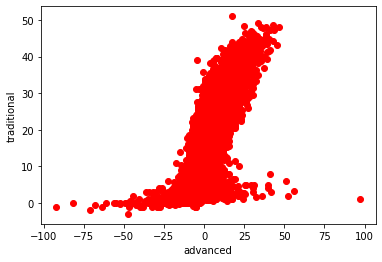

In [ ]:
import io
import pandas as pd
advanced = pd.read_csv(io.BytesIO(uploaded['Advanced.csv']))
AllNBA = pd.read_csv(io.BytesIO(uploaded['End of Season Teams.csv']))
player_totals = pd.read_csv(io.BytesIO(uploaded['Player Totals.csv']))
AwardRace = pd.read_csv(io.BytesIO(uploaded['Player Award Shares.csv']))
advanced = advanced.drop(advanced.index[range(25183,30405)])
player_totals = player_totals.drop(player_totals.index[range(25183,30405)])

advanced['seasonscore']=advanced.vorp+advanced.ws+advanced.bpm
player_totals['seasonscore']=(player_totals.pts+player_totals.stl+player_totals.blk+player_totals.ast+player_totals.trb-player_totals.tov)/player_totals.g
#for i in range (0,1000):
 # print(advanced.player[i], advanced.seasonscore[i],player_totals.seasonscore[i])
#for i in range (0,100):
#  if AllNBA.type[i]=='All-NBA':
  #  print(AllNBA.season[i],AllNBA.player[i],AllNBA.team_rank[i])

#for i in range(0,10000):
 # ranked_players[advanced.player[i]]=advanced.vorp[i]+advanced.ws[i]+advanced.bpm[i]
sum = 0.0
#12658 rows until 2001
for i in range(0,25183): 
  
  if advanced.seasonscore[i]>-100 and advanced.seasonscore[i]<200:
    plt.plot(advanced.seasonscore[i], player_totals.seasonscore[i], 'ro') # ro = red circles
    plt.xlabel('advanced')
    plt.ylabel('traditional')
    sum = sum + advanced.seasonscore[i] + player_totals.seasonscore[i]

avg = sum/25183
print("mean seasonscore for player: ",avg )
plt.show()






Based on the graph above, the goal is to isolate the players in the top right of the graph. We also can say that any player that is below the average is not eligible for the award, it will eliminate the number of datapoints we have to cover. 

seasonscore    float64
games          float64
ws             float64
bpm            float64
vorp           float64
pts            float64
ast            float64
trb            float64
blk            float64
stl            float64
dtype: object
Int64Index([   10,    29,    40,    53,    57,   108,   115,   117,   129,
              134,
            ...
            24480, 24486, 24487, 24520, 24529, 24570, 24607, 24718, 24720,
            24752],
           dtype='int64', length=2404)


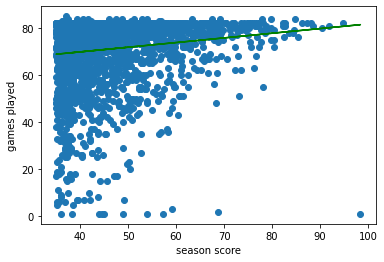

In [ ]:
from sklearn.linear_model import LinearRegression

player_data = pd.DataFrame()
#player_data['player']=advanced.player

player_data['seasonscore']=advanced.seasonscore+player_totals.seasonscore
#player_data=player_data[player_data['seasonscore']>=avg]#filtering out ineligible players
player_data['games']=player_totals.g
#player_data=player_data[player_data['games']>41]#filtering out ineligible players again, could affect 2012
count = 0
# player_data['year']=advanced.season
# player_data['player']=advanced.player
# player_data['award']="None"
player_data['ws']=advanced.ws
player_data['bpm']=advanced.bpm
player_data['vorp']=advanced.vorp
player_data['pts'] = player_totals.pts/player_totals.g
player_data['ast'] = player_totals.ast/player_totals.g
player_data['trb'] = player_totals.trb/player_totals.g
player_data['blk'] = player_totals.blk/player_totals.g
player_data['stl'] = player_totals.stl/player_totals.g


#player_data['ppg']=player_totals['pts']/player_total['g']
awards_dict = {}

# player_data['default_rank']=player_data.seasonscore.rank()
# print(player_data.default_rank)
# print(min(player_data.default_rank))
# for i in player_data.index:
#   if player_data.at[i,'seasonscore']>75:
#     print("Name: ",player_data.at[i,'player'],"score: ",player_data.at[i,'seasonscore'],player_data.at[i,'year'])
print(player_data.dtypes)
player_data = player_data[player_data['seasonscore']>=35]
player_data = player_data[player_data['seasonscore']<=110]

# print(player_data.nlargest(20,player_data.seasonscore))

##rank method


X = player_data.iloc[:,0].values.reshape(-1,1)
y = player_data.iloc[:,1].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(X,y)
y_pred = linear_regressor.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'green')
plt.xlabel('season score')
plt.ylabel('games played')
plt.show
print(player_data.index)
# for i in range(0,12657):
#   #awards_dict[player_data.at[i,'year']]={player_data.at[i,'player']:False}
#   awards_dict[player_data.player[i]]=False
# for i in range (0,12656):
#     # awards_dict[advanced.loc[(pld["year"])]]={advanced.player[i]:False}
#   awards_dict[player_data.loc[2,i]=False

# for i in AllNBA.index:
#   if AllNBA.at[i,'type'] == "All-NBA":
#     awards_dict[i.year][awards_dict[i]]=True
# print(awards_dict[2018]["Lebron James"])

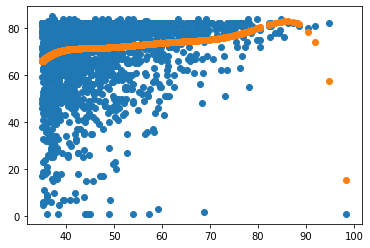

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 6)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.show()

As you can see in these linear and polynomial regressions, there is a great amount of error in these predictors. These datasets have such vast differences in the featurevalues between specific players. I tried to narrow it down for players that only had a well above average season, but each season can have variance that is very high as well.

In [ ]:
player_data['player'] = advanced.player
player_data['year'] = advanced.season

for i in player_data.index: 
  if player_data.at[i,'seasonscore']>78:
    print("Name: ",player_data.at[i,'player'],"score: ",player_data.at[i,'seasonscore'],player_data.at[i,'year'])

# player_data =player_data.drop(labels = ["player",'year'],axis=1,inplace = False)


Name:  Nikola Jokić score:  78.19090909090909 2022
Name:  Nikola Jokić score:  80.31666666666666 2021
Name:  James Harden score:  83.58974358974359 2019
Name:  Russell Westbrook score:  82.72222222222223 2017
Name:  Stephen Curry score:  80.48987341772153 2016
Name:  Kevin Durant score:  82.37037037037038 2014
Name:  LeBron James score:  82.57105263157895 2013
Name:  LeBron James score:  85.38947368421053 2010
Name:  Chris Paul score:  78.54615384615386 2009
Name:  LeBron James score:  88.42345679012345 2009
Name:  LeBron James score:  80.5 2008
Name:  LeBron James score:  78.90126582278481 2006
Name:  Kevin Garnett score:  82.65853658536585 2004
Name:  Tracy McGrady score:  79.82000000000001 2003
Name:  Shaquille O'Neal score:  84.65949367088608 2000
Name:  Bruce Bowen score:  98.4 1997
Name:  David Robinson score:  78.0609756097561 1996
Name:  Michael Jordan score:  82.29756097560976 1996
Name:  David Robinson score:  78.78271604938271 1995
Name:  David Robinson score:  90.425 1994
N

In [ ]:
player_data['value']=player_data['vorp']*.81+player_data['pts']*.1+player_data['bpm']*.03+player_data['trb']*.03+player_data['ws']*.01+player_data['ast']*.01
for i in player_data.index:
  if player_data.at[i,'value']>11:
    print(player_data.at[i,'player'],"value rating: ",player_data.at[i,'value'],player_data.at[i,'year'])

James Harden value rating:  11.902179487179488 2019
Russell Westbrook value rating:  11.57872839506173 2017
Stephen Curry value rating:  11.46732911392405 2016
Kevin Durant value rating:  11.751654320987653 2014
LeBron James value rating:  11.555236842105264 2013
LeBron James value rating:  12.157394736842107 2010
Chris Paul value rating:  11.091871794871796 2009
Dwyane Wade value rating:  11.486949367088606 2009
LeBron James value rating:  13.300950617283954 2009
LeBron James value rating:  11.725666666666669 2008
LeBron James value rating:  11.463797468354432 2006
Kevin Garnett value rating:  11.478756097560977 2004
Tracy McGrady value rating:  11.468333333333334 2003
Shaquille O'Neal value rating:  11.169303797468356 2000
Michael Jordan value rating:  11.736390243902441 1996
David Robinson value rating:  13.138 1994
Michael Jordan value rating:  12.283333333333335 1993
Michael Jordan value rating:  11.177750000000001 1992
Michael Jordan value rating:  12.692585365853658 1991
Michael

This list above is a list of the best individual seasons since 2001. The players on here all won the mvp or finished in the top 3 in the award race. This metric alone is a good indicator of who should be favored as the "best player" and thus will be incorporated into the learning algorithms. 

A fun fact: Stephen Curry's 2015 MVP season he was nearly a unanimous choice, but has the lowest rating of any MVP on this list. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = player_data.iloc[:,:-1]
y = player_data.iloc[:,1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 2 0]
 [0 0 0 ... 3 3 7]
 [0 0 0 ... 6 2 9]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         7.0       0.33      1.00      0.50         1
         9.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         0
        27.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         0
        31.0       0.00      0.00      0.00         1
        35.0       0.33      1.00      0.50         1
        36.0       0.00      0.00      0.00         1
        37.0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.model_selection import train_test_split
backup_advanced = advanced
advanced.drop(labels = ["player","pos","lg","tm","seas_id","player_id"],axis=1,inplace = False)
class PlayerWin:
    def __init__(self, id):
        self.id = id
        self.positive = []
        self.negative = []
        
    def add_positive(self, player):
        self.positive.append(player)
    
    def add_negative(self, player):
        self.negative.append(player)
    
    def get_positive(self):
        return self.positive
    
    def get_negative(self):
        return self.negative
        



def get_feature_columns_from(learning_data, pairwise=False):
    if not pairwise:
        return learning_data.columns.values
    else:
        f1 = [c + '_1' for c in learning_data.columns.values]
        f2 = [c + '_2' for c in learning_data.columns.values]
        f1.extend(f2)
        return np.asarray(f1)



def load_events_data(tag):
    events_data = advanced
    feature_columns =  advanced.columns

    
    return [events_data, feature_columns]

def get_test_train_data(events_data, feature_columns):
    X = events_data.loc[:, feature_columns].values.astype(str)
    print('overall input shape: ' + str(X.shape))

    y = events_data.loc[:,advanced.columns]
    print('overall output shape: ' + str(y.shape))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('training input shape: ' + str(X_train.shape))
    print('training output shape: ' + str(y_train.shape))

    print('testing input shape: ' + str(X_test.shape))
    print('testing output shape: ' + str(y_test.shape))
    
    return [X_train, X_test, y_train, y_test]

# X = advanced['seasonscore'].array
# y= player_totals['seasonscore'].array
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


def train_model(model, prediction_function, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = prediction_function(model, X_train)
    print('train precision: ' + str(precision_score(y_train, y_train_pred,average = 'weighted')))
    print('train recall: ' + str(recall_score(y_train, y_train_pred,average = 'weighted')))
    print('train accuracy: ' + str(accuracy_score(y_train, y_train_pred)))
    y_test_pred = prediction_function(model, X_test)
    print('test precision: ' + str(precision_score(y_test, y_test_pred,average = 'weighted')))
    print('test recall: ' + str(recall_score(y_test, y_test_pred,average = 'weighted')))
    print('test accuracy: ' + str(accuracy_score(y_test, y_test_pred)))
    
    return model


def get_predicted_outcome(model, data):
    return np.argmax(model.predict_proba(data), axis=1).astype(np.float32)
def get_predicted_rank(model, data):
    return model.predict_proba(data)[:, 1]


# learning_data = build_learning_data_from(advanced)
# events_data = EventsGenerator(learning_data, advanced['seasonscore']).run()
# # save_events_data(events_data, learning_data, 'linear')
# events_data, feature_columns = load_events_data('linear')
# learning_data = build_learning_data_from(advanced)

# X_train, X_test, y_train, y_test = get_test_train_data(events_data, feature_columns)



#X_train = X_train.array
#y_train=y_train.array
# X_train=X_train.reshape(-1,1)
# y_train=y_train.reshape(-1,1)
#X_test = X_test.array
#y_test=y_test.array
# X_test.reshape(-1,1)
# y_test.reshape(-1,1)
X = player_data.iloc[:,:-1]
y = player_data.iloc[:,1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20)
model = train_model(LogisticRegression(), get_predicted_outcome, X_train, y_train, X_test, y_test)





train precision: 0.002785677961700442
train recall: 0.008724100327153763
train accuracy: 0.008724100327153763
test precision: 0.012681159420289854
test recall: 0.017391304347826087
test accuracy: 0.017391304347826087


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sampl

These awards are proving to be much harder to predict, simply because of the way that voters have selected players in the past. For example, some players are selected based on their team's performance and their standing within that team. In many season's such as 2015, players like chris paul make All-NBA second team with pretty average stats but since his team is very good and he is the captain of the team he was awarded. Additionally, there are some players who fit multiple positions and this can hurt them in the voting. An example of this is the player Khris Middleton in the year 2020. He is listed as a forward, but also a guard. Russell Westbrook is listed solely at guard. Russell Westbrook had less total voted than Khris Middleton but was awarded the 3rd team because he had more votes at the guard position. This means that the most deserving players also may not get awarded based on the position a voter considers them to play. 


The datasets I have used do not contain the position the players are listed at for the awards, only the position they played the most minutes at that season. This can lead to some players not making it over others so I opted for an approach that simply suggests the best players regardless of position.



With all of this being said, lets try one more algorithm to try and make accurate predictions. 

In [ ]:
#implement the random forest
print("THe shape of our feature is:", player_data.shape)
# player_data['player']=advanced.player
player_data.describe()



THe shape of our feature is: (1147, 10)


,seasonscore,games,ws,bpm,vorp,pts,ast,trb,blk,stl
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,46.008634,67.795118,8.045336,3.884568,3.364167,19.762902,4.346475,7.050744,0.818760,1.184312
std,9.992962,15.439542,3.166966,3.859351,1.693556,4.796816,2.464839,2.984718,0.697156,0.466136
min,35.000000,1.000000,0.000000,-0.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,38.377778,61.000000,6.000000,2.000000,2.300000,16.653091,2.415339,4.537144,0.305320,0.853659
50%,43.172152,73.000000,7.800000,3.200000,3.000000,19.554054,3.804878,6.641026,0.560000,1.123288
75%,50.551821,80.000000,9.800000,4.700000,4.100000,22.673105,5.883827,9.225176,1.165152,1.478261
max,88.423457,85.000000,20.300000,55.700000,11.800000,36.128205,14.000000,15.987179,3.684932,2.885246


In [ ]:
X = np.array(player_data['seasonscore'])
player_data=player_data.drop(['seasonscore'],axis=1)
feature_list = list(player_data.columns)
player_data = np.array(player_data)
train_features, test_features, train_labels, test_labels = train_test_split(player_data, X, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (860, 9)
Training Labels Shape: (860,)
Testing Features Shape: (287, 9)
Testing Labels Shape: (287,)


In [ ]:
baseline_preds = test_features[:, feature_list.index('bpm')+feature_list.index('ws')+feature_list.index('vorp')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  39.5


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000,random_state = 42)
rf.fit(train_features,train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
predictions = rf.predict(test_features)
errors = abs(predictions-test_labels)
print("MAE: ",round(np.mean(errors),2),'degrees')

MAE:  1.52 degrees


In [ ]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.83 %.


In [ ]:
from sklearn.tree import export_graphviz
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
#shortens the depth so it is easier to see each node
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
print(graph)

digraph Tree {
node [shape=box, style="rounded", color="black", fontname="helvetica"];
edge [fontname="helvetica"];
0 [label="vorp <= 4.9\nsquared_error = 103.9\nsamples = 543\nvalue = 45.6"];
1 [label="vorp <= 2.5\nsquared_error = 34.0\nsamples = 457\nvalue = 42.1"];
0 -> 1  [labeldistance="2.5", labelangle=45, headlabel="True"];
2 [label="pts <= 23.0\nsquared_error = 8.7\nsamples = 203\nvalue = 38.2"];
1 -> 2;
3 [label="squared_error = 4.5\nsamples = 176\nvalue = 37.6"];
2 -> 3;
4 [label="squared_error = 18.9\nsamples = 27\nvalue = 43.0"];
2 -> 4;
5 [label="pts <= 21.7\nsquared_error = 31.6\nsamples = 254\nvalue = 45.4"];
1 -> 5;
6 [label="squared_error = 20.2\nsamples = 187\nvalue = 43.3"];
5 -> 6;
7 [label="squared_error = 22.2\nsamples = 67\nvalue = 50.7"];
5 -> 7;
8 [label="vorp <= 7.2\nsquared_error = 70.9\nsamples = 86\nvalue = 63.5"];
0 -> 8  [labeldistance="2.5", labelangle="-45", headlabel="False"];
9 [label="vorp <= 5.2\nsquared_error = 30.9\nsamples = 66\nvalue = 59.4"];
8

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Stat: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Stat: vorp                 Importance: 0.81
Stat: pts                  Importance: 0.1
Stat: bpm                  Importance: 0.03
Stat: trb                  Importance: 0.03
Stat: ws                   Importance: 0.01
Stat: ast                  Importance: 0.01
Stat: games                Importance: 0.0
Stat: blk                  Importance: 0.0
Stat: stl                  Importance: 0.0
